# Q1. Load the scikit-learn version of the diabetes

In [66]:
import numpy as np
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from matplotlib import pyplot as plt
import math

In [67]:
diabetes = load_diabetes()

# Q2. Split the dataset into the training and test sets

In [68]:
X = diabetes.data
y = diabetes.target
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25, random_state=2108)

In [69]:
print(' X_train Shape ' , X_train.shape,'\n')
print(' X_test Shape ' , X_test.shape,'\n')
print(' y_train Shape ' , y_train.shape,'\n')
print(' y_test Shape ' , y_test.shape)

 X_train Shape  (331, 10) 

 X_test Shape  (111, 10) 

 y_train Shape  (331,) 

 y_test Shape  (111,)


# Q3.1.  training and test R2 for the Lasso model using the default parameters

In [70]:
from sklearn.linear_model import Lasso

In [71]:
lasso = Lasso().fit(X_train,y_train)

<b> calculate training and testing R2 for Lasso using formula </b>

In [72]:
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [73]:
y_train_mean = np.mean(y_train)
y_test_mean = np.mean(y_test)

In [74]:
TSS_train = y_train - (np.ones(len(y_train)) * y_train_mean)
TSS_train = (TSS_train)**2
TSS_train = np.sum(TSS_train)
TSS_test = y_test - (np.ones(len(y_test)) * y_test_mean)
TSS_test = (TSS_test)**2
TSS_test = np.sum(TSS_test)

In [75]:
RSS_train = y_train - y_train_pred
RSS_train = (RSS_train)**2
RSS_train = np.sum(RSS_train)
RSS_test = y_test - y_test_pred
RSS_test = (RSS_test)**2
RSS_test = np.sum(RSS_test)

In [76]:
R2_train = 1- (RSS_train/TSS_train)
print ('Calculated Training R2 Score  : ' , R2_train)
R2_test = 1 - (RSS_test/TSS_test)
print ('Calculated Testing R2 Score : ' , R2_test)

Calculated Training R2 Score  :  0.39379334354927165
Calculated Testing R2 Score :  0.28012631287817025


<b>Validating with in built method</b>

In [77]:
from sklearn.metrics import r2_score

R2_train_val = r2_score(y_train,y_train_pred)
print('Training R2 Score : ' , R2_train_val)
R2_test_val = r2_score(y_test,y_test_pred)
print('Testing R2 Score : ' , R2_test_val)

Training R2 Score :  0.39379334354927165
Testing R2 Score :  0.28012631287817025


# Q3.2. How many features does this model use? What are the names of those features ?

In [78]:
lasso.coef_

array([  0.        ,  -0.        , 427.69631665,  15.4548905 ,
         0.        ,   0.        ,  -0.        ,   0.        ,
       295.30350565,   0.        ])

So the no of features in each sample are 10. Out of which, the <b>coefficients are 0 for 7 features</b>. So <b>we are using 3 features</b>.

The names of all the features  in the dataset are :

In [79]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

So the names of the features in use are <b> bmi,bp and s5</b>

# Q4. Load the original diabetes dataset.

In [80]:
org_diabetes = pd.read_table('diabetes.data',header = 0, sep = '\t')

In [81]:
org_diabetes.head(4)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206


In [82]:
org_diabetes.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


# Q5. Split the dataset into the training and test sets

In [83]:
X = org_diabetes.loc[:, 'AGE':'S6']
y = org_diabetes.loc[:,['Y']]

In [84]:
print(X.shape)
print(y.shape)

(442, 10)
(442, 1)


In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state=2108)

In [86]:
print('Train X : ', X_train.shape)
print('Train y : ', y_train.shape)
print('Test X : ', X_test.shape)
print('Test y :' , y_test.shape)

Train X :  (331, 10)
Train y :  (331, 1)
Test X :  (111, 10)
Test y : (111, 1)


# Q6. Repeat item 3 for the current dataset. Comment on the differences from what you saw in item 3.

In [87]:
# X_train = X_train.to_numpy()
# y_train= y_train.to_numpy()
# X_test = X_test.to_numpy()
# y_test= y_test.to_numpy()

lasso = Lasso().fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [88]:
R2_train_val = r2_score(y_train,y_train_pred)
print('Training R2 Score : ' , R2_train_val)
R2_test_val = r2_score(y_test,y_test_pred)
print('Testing R2 Score : ' , R2_test_val)

Training R2 Score :  0.5323447409048088
Testing R2 Score :  0.38155307268479044


In [89]:
lasso.coef_

array([-1.56189252e-02, -1.42465977e+01,  6.82957494e+00,  1.00276585e+00,
        4.52599855e-01, -6.88109074e-01, -1.24230905e+00, -0.00000000e+00,
        2.60179400e+01,  4.66329874e-01])

The training and the testing R2 accuracy seems to <b>significantly improve</b> compared to using the sklearn diabetes dataset.

<b>Imporvement in training R2 Score = .13855139735553715</b>

<b>Improvement in testing R2 Score = .10142675980662019</b>

Also, the <b>change in Training to Testing acccuracy, is lower : -40.5771% vs -39.5205%</b> , but very minutely.

<b>This model uses all 10 available features</b>

# Q7. Preprocess the training and test sets in the same way and avoiding data snooping. Use StandardScaler.


In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Q8.1. Repeat item 3 for the current training and test sets

In [92]:
lasso = Lasso().fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [93]:
R2_train_val = r2_score(y_train,y_train_pred)
print('Training R2 Score : ' , R2_train_val)
R2_test_val = r2_score(y_test,y_test_pred)
print('Testing R2 Score : ' , R2_test_val)

Training R2 Score :  0.5363816471047519
Testing R2 Score :  0.4017375795813014


In [94]:
lasso.coef_

array([-0.        , -7.80426302, 29.08022962, 13.25376567, -7.57473513,
       -0.        , -6.48461898, -0.        , 25.5278107 ,  3.90879271])

<b> The features used in this model are : 'sex', 'bmi', 'bp', 's1', 's3', 's5', 's6'</b>

# Q8.2. Are your current results closer to those in item 3 or item 6?

The current test results are closer to Q6 than to Q3. There is a slight improvement in Training R2 score and a decent increase in test accuracy, when compared to Q6 though.

# Q8.3. Notice that a priori you would expect your current results to be closer to those in item 3, since the reason for different results in items 3 and 6 was that the former were for normalized data while the latter were for the original data. Is this expectation confirmed? If not, why?

No the expectation mentioned in the question is not confirmed

In item 3, <b> The entire sklearn diabetes dataset is Normalized, from which we split for training and testing data. </b> For item 7-8, <b> only the training data is scaled, then the same scaling is applied to the test data </b>. 

The process adopted for <b>item 7</b> is generally a good practice as it <b> helps avoid data snooping </b>, making our model more robust and adaptive to changing sample values. Hence, the performance improves in comparison to item 3. It also highlights, that data snooping is so bad for building a model based on this practice, that a model trained on unscaled dataset performs better (item 3 vs item 6).


It is also worth mentioning that in <b>item 3, the model only uses 3 out of 10 features</b>. This makes a very simplistic model, i.e <b>the model underfits</b>. In item 6, all the features are in use. In <b>item 8, we are using 7 out of 10 features.</b> So, our result is closer to item 6 than item 3.

# Q9.1. Varying the regularization parameter α in the Lasso, plot the test R2 vs the number of features used (i.e., those with non-zero coefficients). Try to make your plot as pretty as possible. (Obviously, it’s subjective.) 

In [95]:
import warnings
warnings.filterwarnings("ignore")

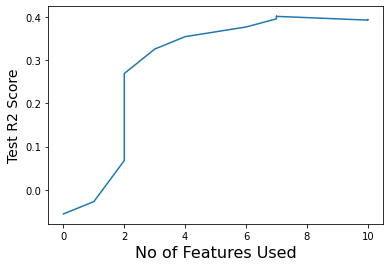

In [96]:
test_R2 = []
features_used = []
alpha = 50
alpha_prime = 50
best_feature_no = 0
for i in range (1,201):
    lasso = Lasso(alpha = alpha,max_iter=100).fit(X_train,y_train)
    y_test_pred = lasso.predict(X_test)
    test_R2.append(r2_score(y_test,y_test_pred))
    #print((r2_score(y_test,y_test_pred)), ' : ', np.sum(lasso.coef_!=0))
    features_used.append(np.sum(lasso.coef_!=0))
    alpha = alpha/pow(10,i/28)

i = test_R2.index(max(test_R2))
alpha_prime = alpha_prime/pow(10,(i+1))
best_feature_no = features_used[i]

plt.plot(features_used,test_R2)
plt.xlabel('No of Features Used', fontsize = 16)
plt.ylabel('Test R2 Score' , fontsize = 14)
plt.show()

# Q9.2. Which point on the curve do you prefer?

In [97]:
print('The best test R2 score is ', max(test_R2))
print ('The best value for alpha at best test R2 score is ', alpha_prime)
print ('The no of features used to achieve best test R2 score are ', best_feature_no)

The best test R2 score is  0.40167694610193583
The best value for alpha at best test R2 score is  5e-09
The no of features used to achieve best test R2 score are  7


The <b>best R2 score</b> is acheived when <b>7 out of 10 features</b> are used. So that is the point in the curve that I prefer.

# Q10.1. Choose the regularization parameter for the Lasso using cross-validation on the training set. 


In [98]:
# Accuracy_score = cross_validate(lasso, X_train, y_train, cv=9,scoring='r2',return_estimator = True)

In [99]:
# for key,val in Accuracy_score.items():
#     if key == 'test_score':
#         print(max(val))
#     if key == 'estimator':
#         print(val)

In [100]:
l_model = LassoCV(cv = 9, random_state = 2108).fit(X_train, y_train)
y_pred = l_model.predict(X_test)
alpha_prime = l_model.alpha_

In [101]:
r2_score(y_test,y_pred)

0.40155785079213535

# Q10.2. Train the Lasso on the whole training set using the chosen values of the parameters

In [102]:
lasso = Lasso(alpha = alpha_prime).fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

In [103]:
used_features = np.sum(lasso.coef_!=0)

# Q10.3. Report the resulting training and test R2 and the number of features used.

In [104]:
R2_train_val = r2_score(y_train,y_train_pred)
print('Training R2 Score : ' , R2_train_val)
R2_test_val = r2_score(y_test,y_test_pred)
print('Testing R2 Score : ' , R2_test_val)
print ('Features used ', used_features )

Training R2 Score :  0.5370721187774337
Testing R2 Score :  0.40155785079213535
Features used  7


# Implement an inductive conformal predictor as follows

# Q11.(a) Split the training set that you obtained in item 5 into two parts:the calibration set of size 99 and the rest of the training set (the training set proper). Use your birthday (in the format DDMM) as random_state.


In [105]:
Cal_size = 99
Train_size = 331

In [106]:
X_train,X_Cal,y_train,y_Cal = train_test_split(X_train, y_train, test_size = Cal_size/Train_size, random_state=2108)

In [107]:
print(' X_train Shape ' , X_train.shape,'\n')
print(' X_Cal Shape ' , X_Cal.shape)

 X_train Shape  (232, 10) 

 X_Cal Shape  (99, 10)


# Q11.(b) Preprocess the training set proper, calibration set, and test set in the same way using StandardScaler. Namely, fit the scaler to the training set proper and then use it to transform all three.

In [108]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_Cal = scaler.transform(X_Cal)
X_test = scaler.transform(X_test)

# Q11. (c) Using the nonconformity measure α = |y − yˆ|, where y is the true label and ˆy is its prediction given the training set proper, for each test sample compute the prediction interval for it. Do this for significance levels 5% and 20%. For each of these significance levels compute:  The length of the prediction intervals for the test samples  The test error rate of your inductive conformal predictor. For computing the predictions ˆy, use the Lasso with parameters chosen by cross-validation on the training set proper

<b> Calculations for Significance Level 5% </b>

In [109]:
significance_level = 0.05

In [110]:
k = math.ceil((1-significance_level)*(99+1))
k = k - 1 
# As indexing start from 0 in python lists, not 1

In [111]:
lasso = Lasso(alpha = alpha_prime).fit(X_train,y_train)
y_Cal_pred = lasso.predict(X_Cal)

In [112]:
alpha_list = abs(y_Cal['Y'].values-y_Cal_pred)
alpha_list = np.sort(alpha_list)

In [113]:
c = alpha_list[k]

In [114]:
print('The length of the prediction intervals for the test samples is ', 2*c )

The length of the prediction intervals for the test samples is  206.75020977361544


In [115]:
upper_bound = np.ones(len(y_test))*c+ lasso.predict(X_test)

In [116]:
lower_bound = lasso.predict(X_test)-np.ones(len(y_test))*c

In [117]:
ER_list = []
y_test = y_test['Y'].values
for i in range (len(y_test)):
    if y_test[i] >= lower_bound[i] and y_test[i] <= upper_bound[i]:
        ER_list.append(0)
    else:
        ER_list.append(1)

Test_Error_Rate = sum(ER_list)/len(ER_list)

In [118]:
print( 'The Test Error Rate for Inductive Conformal Predictor at 5% significance level is ', Test_Error_Rate)

The Test Error Rate for Inductive Conformal Predictor at 5% significance level is  0.07207207207207207


<b> Calculations for Significance Level 20% </b>

In [119]:
significance_level = 0.2

In [120]:
k = math.ceil((1-significance_level)*(99+1))
k = k-1

In [121]:
lasso = Lasso(alpha = alpha_prime).fit(X_train,y_train)
y_Cal_pred = lasso.predict(X_Cal)

In [122]:
alpha_list = abs(y_Cal['Y'].values-y_Cal_pred)
alpha_list = np.sort(alpha_list)

In [123]:
c = alpha_list[k]

In [124]:
print('The length of the prediction intervals for the test samples is ', 2*c )

The length of the prediction intervals for the test samples is  133.27962509226228


In [125]:
upper_bound = np.ones(len(y_test))*c+ lasso.predict(X_test)

In [126]:
lower_bound = lasso.predict(X_test)-np.ones(len(y_test))*c

In [127]:
ER_list = []
for i in range (len(y_test)):
    if y_test[i] >= lower_bound[i] and y_test[i] <= upper_bound[i]:
        ER_list.append(0)
    else:
        ER_list.append(1)

Test_Error_Rate = sum(ER_list)/len(ER_list)

In [128]:
print( 'The Test Error Rate for Inductive Conformal Predictor at 5% significance level is ', Test_Error_Rate)

The Test Error Rate for Inductive Conformal Predictor at 5% significance level is  0.24324324324324326


For Significance level 5%, 

1. The length of the prediction intervals are 206.75020977361544. 
2. The test error rate of inductive conformal predictors is 0.07207207207207207

For Significance level 20%,

1. The length of the prediction intervals are 133.27962509226228. 
2. The test error rate of inductive conformal predictors is 0.24324324324324326